In [8]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# ✅ Step 2: Load Dataset
# Download dataset from file
df = pd.read_csv("/dataset.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
# ✅ Step 3: Basic Data Cleaning
df.dropna(inplace=True)  # remove missing values
df = df[df['price'] > 0]  # remove invalid prices

In [13]:
# ✅ Step 4: Encode Categorical Variables
categorical_cols = ['airline','source_city','destination_city']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [16]:
# ✅ Step 5: Feature Selection
X = df[['airline','source_city','destination_city','duration','stops']]
y = df['price']

In [17]:
# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert 'stops' column to numerical
stops_map = {'zero': 0, 'one': 1, 'two_or_more': 2}
X_train['stops'] = X_train['stops'].map(stops_map)
X_test['stops'] = X_test['stops'].map(stops_map)

# ✅ Step 7: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# ✅ Step 8: Predictions
y_pred = model.predict(X_test)

In [23]:
# ✅ Step 9: Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 18634.004466436138
R2 Score: 0.32640530963133185


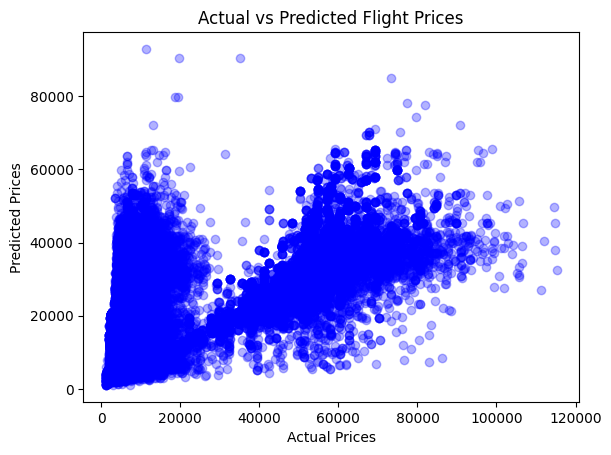

In [24]:
# ✅ Step 10: Visualization
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Flight Prices")
plt.show()

In [25]:
# ✅ Step 11: User Prediction Example
sample = np.array([[1, 2, 5, 180, 1]])  # Airline=1, Source=2, Destination=5, Duration=180 mins, Stops=1
predicted_price = model.predict(sample.reshape(1, -1))
print("💰 Predicted Flight Price: ₹", round(predicted_price[0], 2))

💰 Predicted Flight Price: ₹ 20194.51


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
